In [1]:
#Headers
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Pull out the business data
def getNameFrame() : 

    dataframe = pd.read_csv('../input/dbscan/Business Dataset (Texas).csv', usecols = ["name", "chain_name", "city"])
        
    return dataframe

df = getNameFrame()

In [3]:
#Pull out the numbers 
cities = {}
cities_w_chain = {}
cities_wo_chain = {}

for i, row in df.iterrows() : 
            
    cities[row["city"]] = cities.get(row["city"], 0) + 1
    cities_w_chain[row["city"]] = cities_w_chain.get(row["city"], 0)
    cities_wo_chain[row["city"]] = cities_wo_chain.get(row["city"], 0)
    
    if type(row["chain_name"]) == float : 
        
        cities_wo_chain[row["city"]] = cities_wo_chain.get(row["city"], 0) + 1
        
    else : 
        
        cities_w_chain[row["city"]] = cities_w_chain.get(row["city"], 0) + 1
            

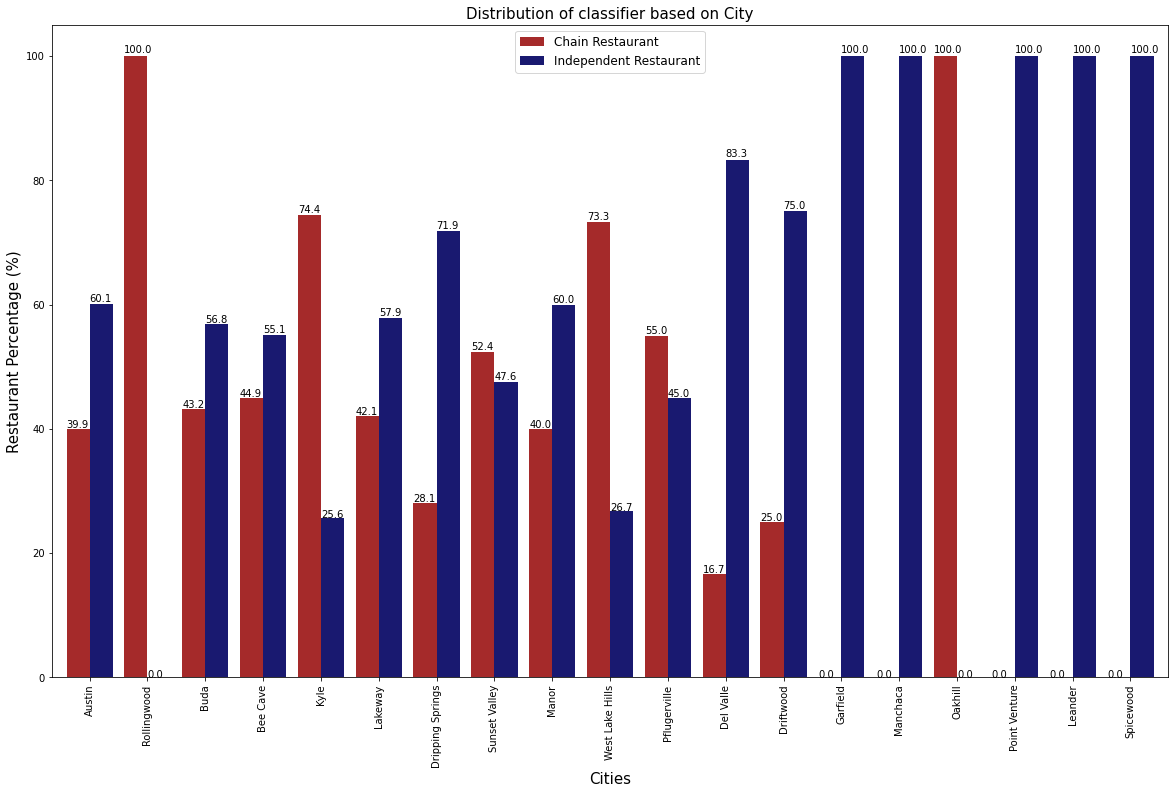

In [4]:
#Visualization Bar Plot
for key in cities.keys() : 
    
    cities_wo_chain[key] /= cities[key]
    cities_wo_chain[key] = round( cities_wo_chain[key] * 100, 1) 
    
    cities_w_chain[key] /= cities[key]
    cities_w_chain[key] = round( cities_w_chain[key] * 100, 1) 

w_chain_series = pd.Series(cities_w_chain.values(), index=cities_w_chain.keys())
wo_chain_series = pd.Series(cities_wo_chain.values(), index=cities_wo_chain.keys())    

plotdf = pd.DataFrame({"Chain Restaurant":w_chain_series,"Independent Restaurant":wo_chain_series})

ax = plotdf.plot.bar(color=["brown", "midnightblue"], rot=90, figsize=(20, 12), width=0.8)
ax.set_title("Distribution of classifier based on City", size=15)
ax.set_xlabel("Cities", size=15)
ax.set_ylabel("Restaurant Percentage (%)", size=15)
plt.legend(prop={'size': 12})
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.000, p.get_height() * 1.005))
    
plt.show()